In [23]:
# импортируем библиотеку pandas для работы с датафреймами
import pandas as pd
# импортируем seaborn для визуализации
import seaborn as sns
# импортируем sklearn для кластеризации
from sklearn.cluster import KMeans 

In [24]:
# загрузим данные
df = pd.read_csv('data\pokemon.csv')
# датасет содержит имя покемона, силу его защиты, атаки и скорость
df.head()

<>:2: SyntaxWarning: invalid escape sequence '\p'
<>:2: SyntaxWarning: invalid escape sequence '\p'
C:\Users\Кирилл\AppData\Local\Temp\ipykernel_1444\4116006505.py:2: SyntaxWarning: invalid escape sequence '\p'
  df = pd.read_csv('data\pokemon.csv')


,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,RealClusters
0,Bulbasaur,318,45,77.634658,50.854702,65,65,45,2
1,Ivysaur,405,60,67.454273,39.202323,80,80,60,1
2,Venusaur,525,80,76.007423,47.605846,100,100,80,2
3,VenusaurMega Venusaur,625,80,77.828031,50.744911,122,120,80,2
4,Charmander,309,39,68.658104,37.890027,60,50,65,1


## k-means кластеризация

<Axes: xlabel='Attack', ylabel='Defense'>

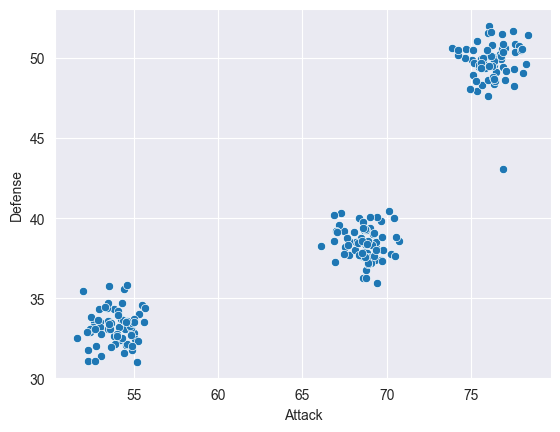

In [25]:
# попробуем кластеризовать покемонов по их силе атаки и защиты
# для этого сохраним в матрицу X 2 интересующих признака: атаку и защиту
X = df[['Attack', 'Defense']]

#визуализируем
sns.scatterplot(x=df.Attack, y=df.Defense)

Теперь инициализируем алгоритм k-means. Для этого зададим:  
    - n_clusters - количество кластеров  
    - init - стратегию кластеризации  
    - n_init - количество запусков алгоритма k-means  
    - random_state - для того, чтобы результаты от запуска к запуску воспроизводились  

<Axes: xlabel='Attack', ylabel='Defense'>

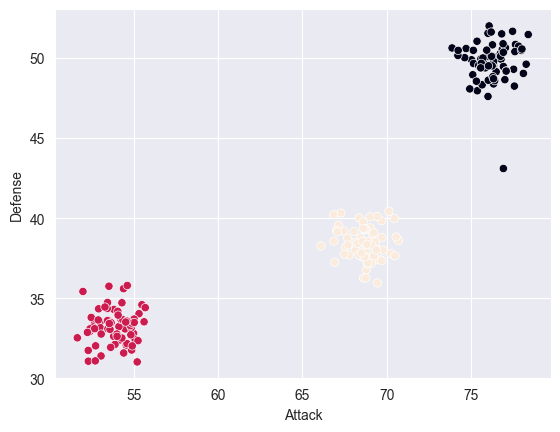

In [26]:
# инициализируем алгоритм k-means, с количеством кластеров 3
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42)

# запустим обучение модели
kmeans.fit(X)

# предскажем, к какому кластеру принадлежат покемоны 
predictions = kmeans.predict(X)
# если мы хотим метки класса для тех же данных, на которых обучили модель, то можно просто попросить labels
predictions = kmeans.labels_

# сохраним предсказания в датафрейм
df['Clusters_k3'] = predictions

#визуализируем результаты, параметр c принимает вектор с номерами классов, для группировки объектов по цветам 
sns.scatterplot(x=df.Attack, y=df.Defense, c=predictions)

В данном случае видно, что данные хорошо делятся на три кластера, а также есть одна точка-выброс. 

Попробуем увеличить количество кластеров до четырёх, чтобы вынести выброс в отдельный кластер:

<Axes: xlabel='Attack', ylabel='Defense'>

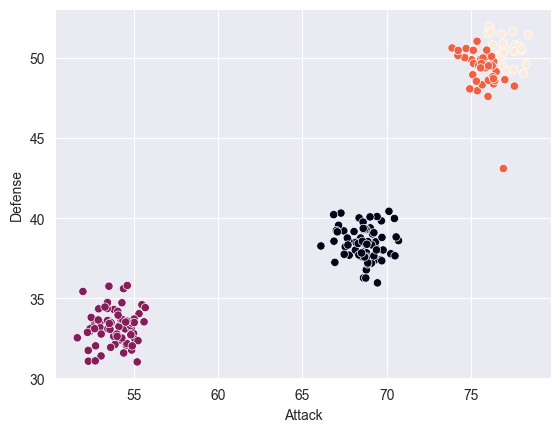

In [27]:
# инициализируем алгоритм k-means, с количеством кластеров 4
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, random_state=42)

# запустим обучение модели
kmeans.fit(X)

# предскажем, к какому кластеру принадлежат покемоны 
predictions = kmeans.predict(X)
# если мы хотим метки класса для тех же данных, на которых обучили модель, то можно просто попросить labels
predictions = kmeans.labels_

# сохраним предсказания в датафрейм
df['Clusters_k4'] = predictions

#визуализируем результаты, параметр c принимает вектор с номерами классов, для группировки объектов по цветам 
sns.scatterplot(x=df.Attack, y=df.Defense, c=df.Clusters_k4)

Как видим, «отделить» выброс от других данных не получается: k-means не умеет обрабатывать выбросы.

В данном случае мы проводили кластеризацию по двум признакам. Мы сделали это для того, чтобы можно было визуализировать результаты. Для кластеризации можно использовать и более двух признаков, однако в таком случае кластеризация будет проходить в n-мерном пространстве (для трёх признаков пространство будет трёхмерным), и визуализировать результаты будет непросто.

В трёхмерном и другом n-мерном случае кластеризация запускается следующим образом:

In [28]:
# добавляем третий признак - скорость покемона, а алгоритм такой же
X = df[['Attack', 'Defense', 'Speed']]

# инициализируем алгоритм k-means, с количеством кластеров 3
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42)

# запустим обучение модели
kmeans.fit(X)

# предскажем, к какому кластеру принадлежат покемоны 
predictions = kmeans.predict(X)
# если мы хотим метки класса для тех же данных, на которых обучили модель, то можно просто попросить labels
predictions = kmeans.labels_

# сохраним предсказания в датафрейм
df['Clusters_k3_2d'] = predictions

## Выбор количества кластеров с помощью метода локтя

<Axes: xlabel='cluster', ylabel='inertia'>

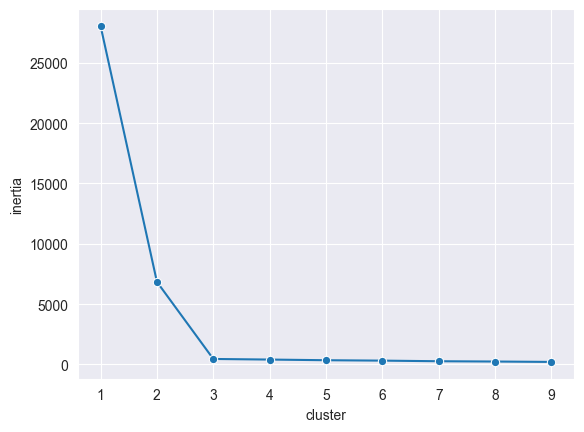

In [29]:
# функция, которая принимает количество кластеров для k-means и матрицу с признаками объектов,и возвращает инерцию 
def get_inertia(cluster_num, X):
# инициализируем алгоритм кластеризации
    k_means =  KMeans(n_clusters=cluster_num, random_state=42)
# запускаем алгоритм k-means
    k_means.fit(X)
# находим значение инерции
    inertia = k_means.inertia_
# возвращаем значение инерции
    return inertia

# создадим пустой словарь, ключами будут инерция и количество кластеров
res = {"inertia": [], "cluster": []}

# выберем нужные данные 
X = df[['Attack', 'Defense']]

# итерируемся по разным размерам кластеров (от 1 до 9) и сохраним значение инерции для каждого кластера
for cluster_num in range(1, 10):
# сохраняем значения
    res["inertia"].append(get_inertia(cluster_num, X))
    res["cluster"].append(cluster_num)

# сохраним в датафрейм значение инерции и количество кластеров
res_df = pd.DataFrame(res)

# установим стиль для визуализиции
sns.set_style("darkgrid")
# визуализируем зависимость значения инерции от количества кластеров
sns.lineplot(data=res_df, x="cluster", y="inertia", marker= "o")

## Выбор количества кластеров с помощью коэффициент силуэта

<Axes: xlabel='cluster', ylabel='silhouette'>

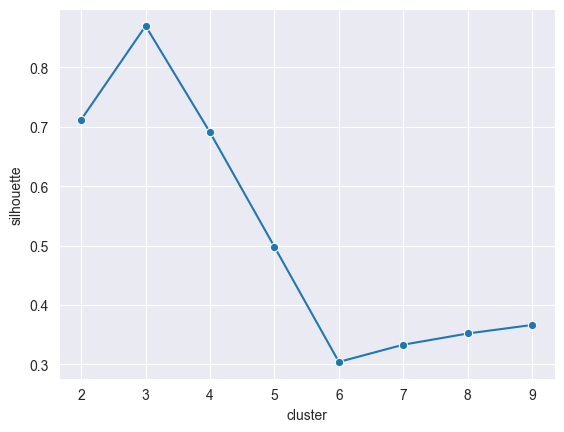

In [30]:
# импортируем метрику силуэт
from sklearn.metrics import silhouette_score

# напишем функцию, как и при подсчете метода локтя
def get_silhouette(cluster_num, X):
    k_means =  KMeans(n_clusters=cluster_num, init='k-means++', n_init=10, random_state=42)
    k_means.fit(X)
# подсчитаем метрику силуэта, передав данные и то, к каким кластерам относятся объекты
    silhouette = silhouette_score(X, k_means.predict(X))
    return silhouette

# создадим пустой словарь, ключами будут инерция и количество кластеров
silhouette_res = {"silhouette": [], "cluster": []}

# выберем нужные данные 
X = df[['Attack', 'Defense']]

for cluster_num in range(2, 10):
    silhouette_res["silhouette"].append(get_silhouette(cluster_num, X))
    silhouette_res["cluster"].append(cluster_num)
    
# сохраним в датафрейм значение силуэта и количество кластеров
silhouette_df = pd.DataFrame(silhouette_res)

# установим стиль для визуализиции
sns.set_style("darkgrid")
# визуализируем зависимость значения инерции от количества кластеров
sns.lineplot(data=silhouette_df, x="cluster", y="silhouette", marker= "o")

## Метрики

In [31]:
# импортируем подсчет метрики однородности кластеров
from sklearn.metrics.cluster import homogeneity_score

# передаем предсказанную информацию к какому кластеру относятся объекты датасета и правильные ответы
print(homogeneity_score(labels_true=[0, 0, 1, 1], labels_pred=[0, 0, 1, 1]))

print(homogeneity_score(labels_true=[1, 1, 0, 0], labels_pred=[1, 1, 0, 0]))

1.0
1.0


In [32]:
# теперь посчитаем насколько однородными получились кластеры с покемонами
print(homogeneity_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k3))

print(homogeneity_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k4))

1.0
1.0


In [33]:
# импортируем метрику полноты
from sklearn.metrics.cluster import completeness_score

# передаем предсказанную информацию к какому кластеру относятся объекты датасета и правильные ответы, подсчитываем метрику
print(completeness_score(labels_true=[0, 0, 1, 1], labels_pred=[0, 0, 1, 1]))


1.0


In [34]:
# посчитаем насколько полными получились кластеры с покемонами
print(completeness_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k3))

# посчитаем насколько полными получились кластеры с покемонами
print(completeness_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k4))

1.0
0.8334191510029214


In [35]:
# импортируем из библиотеки sklearn подсчет v-меры
from sklearn.metrics import v_measure_score


# теперь посчитаем v-меру для кластеров с покемонами
print(v_measure_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k3))

print(v_measure_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k4))

1.0
0.9091419717602737


In [36]:
# импортируем из библиотеки sklearn подсчет индекса Рэнда
from sklearn.metrics.cluster import rand_score

# теперь посчитаем насколько полными получились кластеры с покемонами
print(rand_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k3))

print(rand_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k4))

1.0
0.9482832109874497


## Юнит 2. Другие методы кластеризации

In [37]:
# импортируем алгомеративную кластеризацию из sklearn
from sklearn.cluster import AgglomerativeClustering


# запускаем агломеративную кластеризацию
agglomerative_clustering = AgglomerativeClustering(n_clusters=2)

# обучаем модель
agglomerative_clustering.fit(X)

# получаем метки c информацией, к какому кластеру относятся объекты
agglomerative_clustering.labels_

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1])

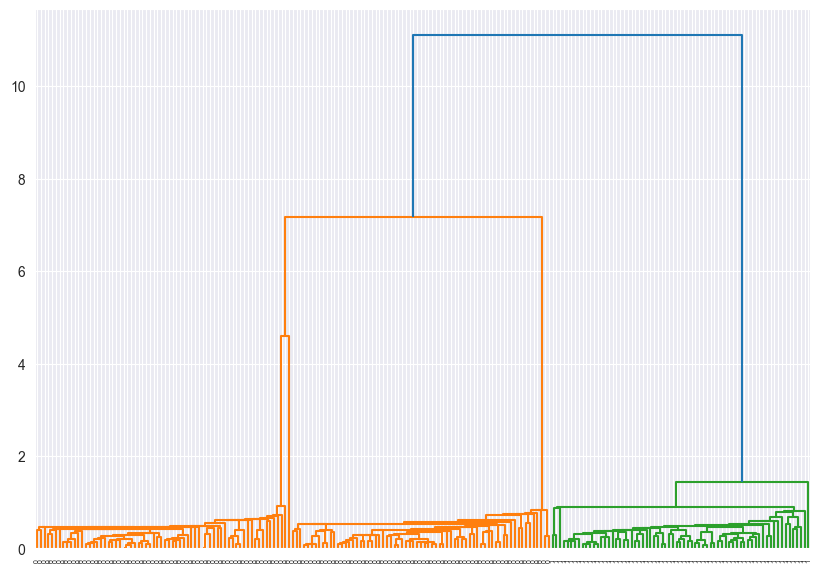

In [38]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(X, 'single')


plt.figure(figsize=(10, 7))

dendrogram(linked,
            orientation='top',
            labels=agglomerative_clustering.labels_,
            distance_sort='descending',
            show_leaf_counts=True)

plt.show()

## GMM кластеризация

In [39]:
# импортируем библиотеки numpy и sklearn
import numpy as np
from sklearn.mixture import GaussianMixture


gm_clustering = GaussianMixture(n_components=3, random_state=42)

# обучаем модель 
gm_clustering.fit(X)

# для матрицы X получаем предсказания к какому кластеру принадлежат объекты
gm_prediction = gm_clustering.predict(X)

<Axes: xlabel='Attack', ylabel='Defense'>

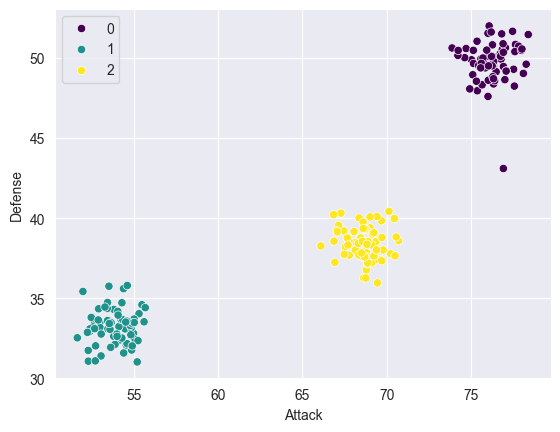

In [40]:
# sns.set_style("white")
sns.scatterplot(x=df['Attack'], y=df['Defense'], hue=gm_prediction, palette='viridis')

## Спектральная кластеризация

In [41]:
df

,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,RealClusters,Clusters_k3,Clusters_k4,Clusters_k3_2d
0,Bulbasaur,318,45,77.634658,50.854702,65,65,45,2,0,3,2
1,Ivysaur,405,60,67.454273,39.202323,80,80,60,1,2,0,0
2,Venusaur,525,80,76.007423,47.605846,100,100,80,2,0,2,0
3,VenusaurMega Venusaur,625,80,77.828031,50.744911,122,120,80,2,0,3,0
4,Charmander,309,39,68.658104,37.890027,60,50,65,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
201,Skiddo,350,66,75.932190,50.498392,62,57,52,2,0,2,0
202,Gogoat,531,123,76.919520,50.361511,97,81,68,2,0,3,0
203,Clauncher,330,50,76.038055,49.515184,58,63,44,2,0,2,2
204,Clawitzer,500,71,66.854449,40.217467,120,89,59,1,2,0,0


In [42]:
# вызываем из sklearn SpectralClustering 
from sklearn.cluster import SpectralClustering


# запускаем кластеризацию 
spectral_clustering = SpectralClustering(n_clusters=4, n_init=1500, random_state=42)

spectral_clustering.fit(df[['Attack', 'Defense']])
# получаем результаты кластеризации
spectral_predictions = spectral_clustering.labels_

<Axes: xlabel='Attack', ylabel='Defense'>

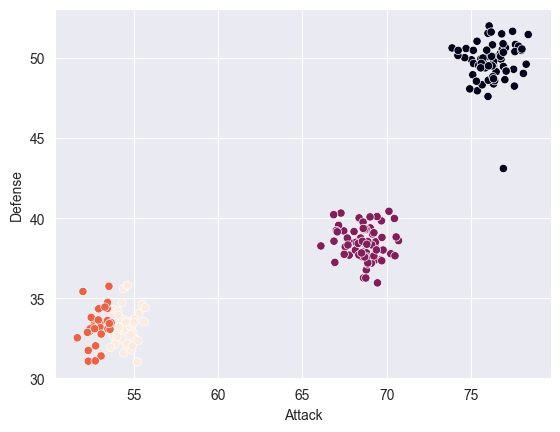

In [43]:
sns.scatterplot(x=df.Attack, y=df.Defense, c=spectral_predictions)

## DBSCAN

In [44]:
df

,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,RealClusters,Clusters_k3,Clusters_k4,Clusters_k3_2d
0,Bulbasaur,318,45,77.634658,50.854702,65,65,45,2,0,3,2
1,Ivysaur,405,60,67.454273,39.202323,80,80,60,1,2,0,0
2,Venusaur,525,80,76.007423,47.605846,100,100,80,2,0,2,0
3,VenusaurMega Venusaur,625,80,77.828031,50.744911,122,120,80,2,0,3,0
4,Charmander,309,39,68.658104,37.890027,60,50,65,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
201,Skiddo,350,66,75.932190,50.498392,62,57,52,2,0,2,0
202,Gogoat,531,123,76.919520,50.361511,97,81,68,2,0,3,0
203,Clauncher,330,50,76.038055,49.515184,58,63,44,2,0,2,2
204,Clawitzer,500,71,66.854449,40.217467,120,89,59,1,2,0,0


<Axes: xlabel='Attack', ylabel='Defense'>

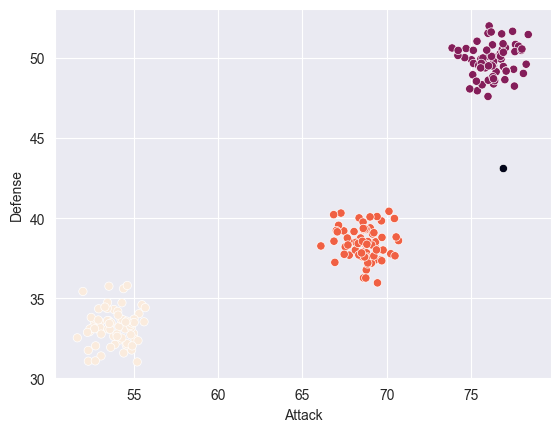

In [45]:
# импортируем DBSCAN кластеризацию
from sklearn.cluster import DBSCAN

#запускаем кластеризацию на наших данных
clustering = DBSCAN(eps=3, min_samples=3).fit(df[['Attack', 'Defense']])

# Далее можно визуализировать результаты, как мы делали с алгоритмом k-means
sns.scatterplot(x=df.Attack, y=df.Defense, c=clustering.labels_)